<a href="https://colab.research.google.com/github/SergioManuelJob/DeepLearningCartpole/blob/master/QLearning_Cartpole_Sergio_Manuel_Su%C3%A1rez_Su%C3%A1rez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalaciones e importaciones necesarias.

In [ ]:
!pip install pygame
!pip install gym

In [24]:
import random
import gym
from collections import deque
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

  and should_run_async(code)



# Parámetros.

Entorno donde vamos a ver nuestro programa.

In [23]:
env = gym.make('CartPole-v0', render_mode="rgb_array")

  logger.warn(

  deprecation(

  deprecation(



Cantidad de estados que hay.

In [ ]:
state_size = env.observation_space.shape[0]
state_size

4

Cantidad de acciones que se pueden hacer.

In [ ]:
action_size = env.action_space.n
action_size

2

Tamaño del cesto.

In [ ]:
batch_size = 32

Número de veces que vamos a "jugar".

In [ ]:
n_episodes = 1001

Directorio donde ponemos el output del modelo.

In [ ]:
output_dir = 'model_output/cartpole'
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

# Creamos el agemte con el cual vamos a trabajar.

### init():

Definimos el tamaño de acciones y estados con lo antes declarado.

Le ponemos una memoria limitada de los últimos 2000 pasos para que vaya borrando los últimos conforme avanza, esto lo hace más eficiente.

Gamma es nuestro factor de descuento, mientras que epsilon es nuestro factor de exploración, lo cual nos va a ayudar a aprender movimientos buenos que podríamos no descubrir sin este valor ya que solamente explotaríamos los conocimientos conseguidos sin buscar mejores movimientos, hacemos que haga un descenso de gradiente para cuando nuestra sistema sea lo suficiente inteligente, y le ponemos un mínimo. También incorporamos un factor de aprendizaje, que es el que utilizaremos para el modelo más adelante. Y una llamada al método propio de crear el modelo.

### build_model():

Aquí creamos un modelo simple, donde le vamos unas dimensiones de entradas igual a los estados del entorno (4), para que después del entrenamiento nos devuelva una acción, por eso la última capa tiene 2 neuronas (2 acciones) y es lineal. Al modelo le ponemos el "learning_rate" previamente definido también.

### remember():

Este metódo aunque simple es el más importante, ya que vamos a guardar en la memoria el estado, acción, recompensa, siguiente estado (lo que predice el modelo) y si ya terminó o no.

### act():

Aquí es donde vemos en uso la variable epsilon que definimos con anterioridad, donde vamos a crear un número random de entre 0 y 1, y si este es menor que epsilon (que empieza como hemos definido, siendo 1), actuará explotando los conocimientos, sino, devolverá una acción aleatoria, es decir, explorará. La explotación del conocimiento sin embargo, será una predicción de nuestro modelo previamente definido (en build_model) que nos devolverá que acción hay que tomar sabiendo el estado en el que se encuentra.

### replay():

Este es el método que entrenará al modelo de nuestro agente, básicamente coge un ejemplo (o sample) del tamaño del batch que definimos anteriormente, y lo pasará por un bucle utilizando cada una de las variables que agregamos a la lista de la memoria, y dentro del bucle definirimos el "target" (o "y"), y calcularemos el target dependiendo de si terminó el juego o no, si terminó el target es la recompensa, sin embargo, si no terminó el target es igual a la recompensa + el factor de descuento (gamma) multiplicado por la predicción del siguiente estado. Además, creamos un target_f que es la predicción de nuestro modelo, al cual añadiremos nuestro target para más adelante entrenar al modelo utilizando el state como X, y el target_f como Y, que es tanto el target del movimiento actual como el futuro. Para terminar, reducimos nuestro epsilon si no ha bajado del mínimo, haciendo un descenso de gradiente.

### load() y save():

Métodos simples para cargar y guardar los pesos.


In [ ]:
class DQNAgent:

  def __init__(self, state_size, action_size):
    self.state_size = state_size
    self.action_size = action_size

    self.memory = deque(maxlen=2000)

    self.gamma = 0.95

    self.epsilon = 1.0
    self.epsilon_decay = 0.995
    self.epsilon_min = 0.01

    self.learning_rate = 0.001

    self.model = self._build_model()

  def _build_model(self):
    model = Sequential()

    model.add(Dense(24, input_dim = self.state_size, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(self.action_size, activation='linear'))

    model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))

    return model

  def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))

  def act(self, state):
    if np.random.rand() <= self.epsilon:
      return random.randrange(self.action_size)

    act_values = self.model.predict(state)
    return np.argmax(act_values[0])

  def replay(self, batch_size):

    minibatch = random.sample(self.memory, batch_size)

    for state, action, reward, next_state, done in minibatch:
      target = reward
      if not done:
        target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
      target_f = self.model.predict(state)
      target_f[0][action] = target

      self.model.fit(state, target_f)

    if self.epsilon > self.epsilon_min:
      self.epsilon *= self.epsilon_decay

  def load(self, name):
    self.model.load_weights(name)

  def save(self, name):
    self.model.save_weights(name)

## Instanciamos el agente.

In [ ]:
agent = DQNAgent(state_size, action_size)

## Interactuamos con el entorno.

Método de "jugar" renderizando.

  and should_run_async(code)

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(

  if not isinstance(terminated, (bool, np.bool8)):



episodes: 0/1001, score: 14, e: 1.0
1/1 [==============================] - 0s 8ms/step - loss: 0.5190
episodes: 1/1001, score: 15, e: 0.99
1/1 [==============================] - 0s 8ms/step - loss: 0.5074
episodes: 2/1001, score: 27, e: 0.99
1/1 [==============================] - 0s 21ms/step
episodes: 3/1001, score: 21, e: 0.99
1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: 

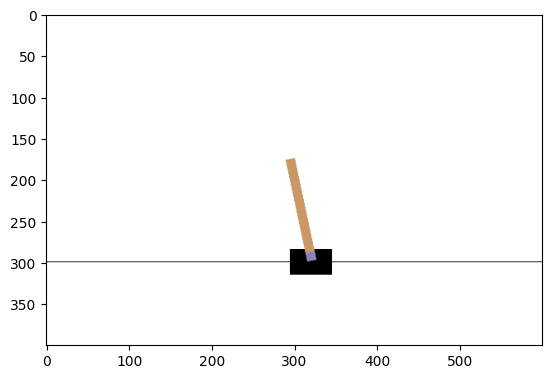

In [27]:
done = False
for e in range(n_episodes):

  state = env.reset()
  state = np.reshape(state, [1, state_size])

  for time in range(5000):

    plt.imshow(env.render(mode="rgb_array")[0])
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward = reward if not done else -10
    next_state = np.reshape(state, [1, state_size])

    agent.remember(state, action, reward, next_state, done)

    state = next_state

    if done:
      print("episodes: {}/{}, score: {}, e: {:.2}".format(e, n_episodes, time, agent.epsilon))
      break

  if len(agent.memory) > batch_size:
    agent.replay(batch_size)

  if e % 50 == 0:
    agent.save(output_dir + "weights_" + "{:04d}".format(e) + ".hdf5")